# HomeWork 1

**Bakhshande 98522157**

# Q6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Flatten, Activation
from keras.models import Sequential
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


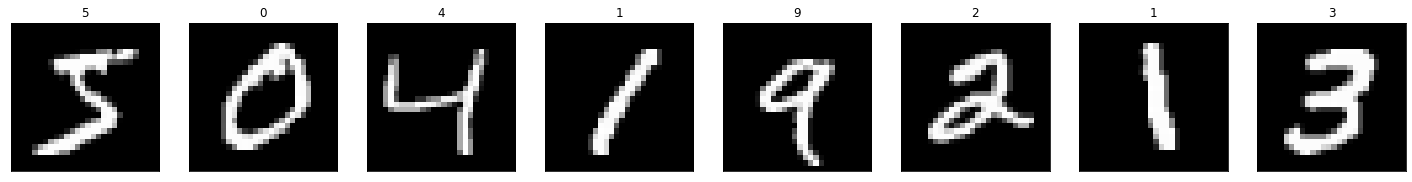

In [3]:
plt.figure(figsize=(25,4))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])

In [4]:
x_train = x_train.astype(float) / 255.0
x_test  = x_test.astype(float) / 255.0

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

dataset_size = x_train.shape[0]
test_dataset_size = x_test.shape[0]
input_size = x_train[0].shape

print(dataset_size)
print(test_dataset_size)
print(num_classes)

60000
10000
10


In [5]:
model = Sequential()

model.add(Input(shape=input_size))
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 activation_2 (Activation)   (None, 10)                0

In [6]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(),
    metrics = ['accuracy']
    )

In [7]:
history = model.fit(
    x_train, y_train,
    batch_size = 128,
    epochs = 40,
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/40
375/375 [==============================] - 2s 3ms/step - loss: 1.4852 - accuracy: 0.6363 - val_loss: 0.7554 - val_accuracy: 0.8478
Epoch 2/40
375/375 [==============================] - 1s 3ms/step - loss: 0.5927 - accuracy: 0.8582 - val_loss: 0.4515 - val_accuracy: 0.8856
Epoch 3/40
375/375 [==============================] - 1s 3ms/step - loss: 0.4328 - accuracy: 0.8854 - val_loss: 0.3727 - val_accuracy: 0.9003
Epoch 4/40
375/375 [==============================] - 1s 3ms/step - loss: 0.3734 - accuracy: 0.8981 - val_loss: 0.3343 - val_accuracy: 0.9081
Epoch 5/40
375/375 [==============================] - 1s 3ms/step - loss: 0.3396 - accuracy: 0.9046 - val_loss: 0.3098 - val_accuracy: 0.9133
Epoch 6/40
375/375 [==============================] - 1s 3ms/step - loss: 0.3164 - accuracy: 0.9111 - val_loss: 0.2920 - val_accuracy: 0.9163
Epoch 7/40
375/375 [==============================] - 1s 3ms/step - loss: 0.2983 - accuracy: 0.9154 - val_loss: 0.2779 - val_accuracy: 0.9204
Epoch 

In [8]:
loss, accuracy = model.evaluate(x_train, y_train, batch_size=128, verbose=1)
print("Train loss:", loss, 'Train accuracy:', accuracy)

469/469 [==============================] - 1s 2ms/step - loss: 0.1236 - accuracy: 0.9648
Train loss: 0.12364466488361359 Train accuracy: 0.9647833108901978


In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print("Test loss:", test_loss, 'Test accuracy:', test_accuracy)

79/79 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.9599
Test loss: 0.13685601949691772 Test accuracy: 0.9599000215530396


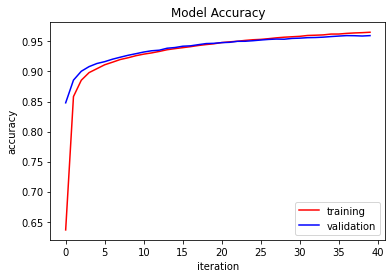

In [10]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

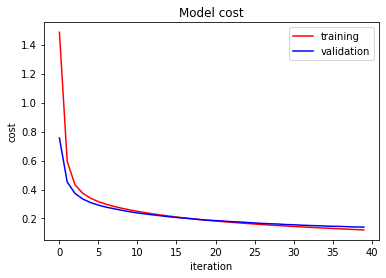

In [11]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('Model cost')
plt.ylabel('cost')
plt.xlabel('iteration')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()